# Regression

### Get data

In [1]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [2]:
!wget $data

--2025-10-13 17:08:07--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  4.43MB/s    in 0.3s    

2025-10-13 17:08:08 (4.43 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Data preparation

In [5]:
# let's clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# chose all columns that contains strings
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
# clean data in the same way how we did it with columns
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploratory data analysis

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


In [9]:
# distribution of price
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='msrp', ylabel='Count'>

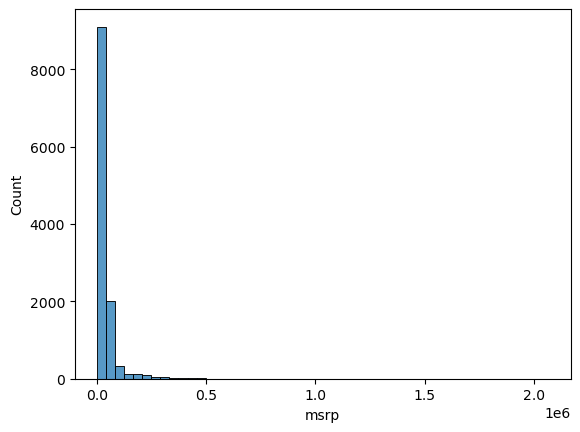

In [10]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

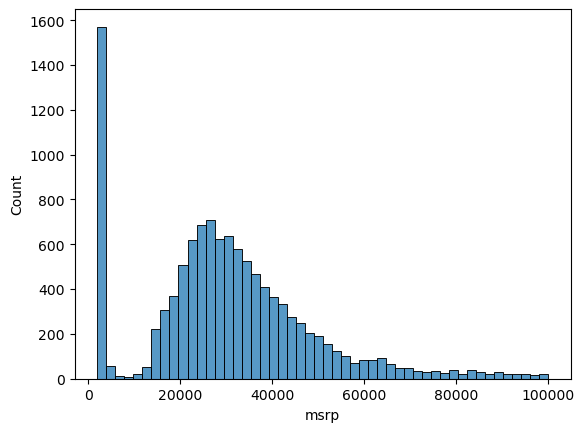

In [11]:
# let's look at car's price lower than 100k
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [12]:
# let's get rid of long tail distribution
np.log([1, 10, 1000, 10000, 100000])

array([ 0.        ,  2.30258509,  6.90775528,  9.21034037, 11.51292546])

In [13]:
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 10000 + 1, 100000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478,  9.21044037,
       11.51293546])

In [14]:
np.log1p([0, 1, 10, 1000, 10000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478,  9.21044037,
       11.51293546])

<Axes: xlabel='msrp', ylabel='Count'>

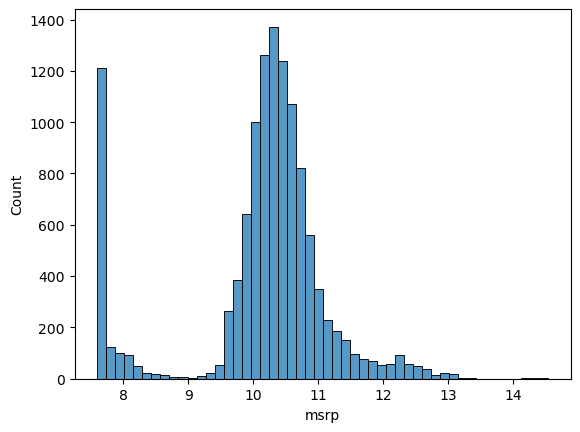

In [15]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

In [16]:
# missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting up the validation framework

In [17]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
n, n_val, n_test, n_train

(11914, 2382, 2382, 7150)

In [18]:
# let's shuffle index, so we will have different data in different sets
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [19]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [20]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [21]:
len(df_val), len(df_test), len(df_train)

(2382, 2382, 7150)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [24]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [25]:
len(df_val), len(df_test), len(df_train)

(2382, 2382, 7150)

In [26]:
len(y_val), len(y_test), len(y_train)

(2382, 2382, 7150)

In [27]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

### Linear Regression

In [28]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [29]:
# let's take engine_hp, city_mpg and popularity as a feature vector
xi = [453, 11, 86]

def g(xi):
    # TODO: implement
    # do something
    return 10000

g(xi)

10000

In [30]:
# g(xi) = w0 + w1*xi1 + w2*xi2 + w3*xi3
# g(xi) = w0 + w*xi

In [31]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred += w[j] * xi[j]
    return pred

In [32]:
linear_regression(xi)

12.312

In [33]:
print(np.expm1(linear_regression(xi)))

222347.2221101062


### Linear regression: vector form

In [34]:
def dot(xi, w):
    res = 0
    for j in range(len(xi)):
        res += xi[j]*w[j]
    return res


def linear_regression(xi):
    return w0 + dot(xi, w)


linear_regression(xi)

12.312000000000001

In [35]:
w_new = [w0] + w


def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)


linear_regression(xi)

12.312

### Training a linear regression model

In [37]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [50]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
X = np.column_stack([ones, X])

In [52]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [53]:
XTX = X.T.dot(X)

In [54]:
XTX_inv = np.linalg.inv(XTX)

In [55]:
w_full = XTX_inv.dot(X.T).dot(y)

In [56]:
w_full

array([ 3.00067767e+02, -2.27742529e-01, -2.57694130e+00, -2.30120640e-02])

In [57]:
w0, w = w_full[0], w_full[1:]
w0, w

(np.float64(300.0677669255575), array([-0.22774253, -2.5769413 , -0.02301206]))

In [58]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [59]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

train_linear_regression(X, y)

(np.float64(300.0677669255575), array([-0.22774253, -2.5769413 , -0.02301206]))

### Car price baseline model

In [62]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [70]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity',]
X_train = df_train[base].fillna(0).values

In [72]:
w0, w = train_linear_regression(X_train, y_train)

In [73]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

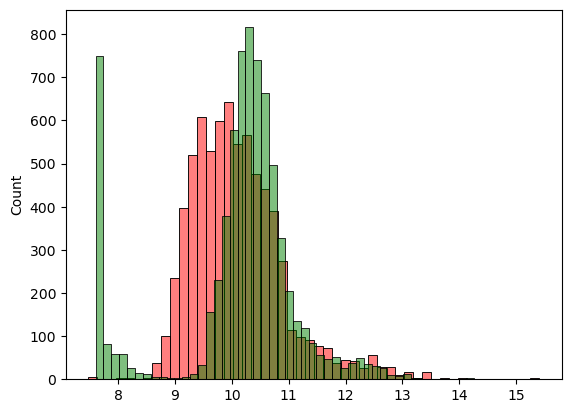

In [77]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='green', alpha=0.5, bins=50)

### RMSE

In [80]:
def rmse(y, y_pred):
    squared_error = (y - y_pred) ** 2
    mean_suqared_error = squared_error.mean()
    return np.sqrt(mean_suqared_error)

In [81]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

### Validating model

In [82]:
def prepare_X(df):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity',]
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [84]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7616530991301562)

### Simple feature engineering

In [88]:
def prepare_X(df):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity',]
    features = base + ['age']
    df = df.copy()
    df['age'] = 2017 - df.year
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [92]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058324)

<Axes: ylabel='Count'>

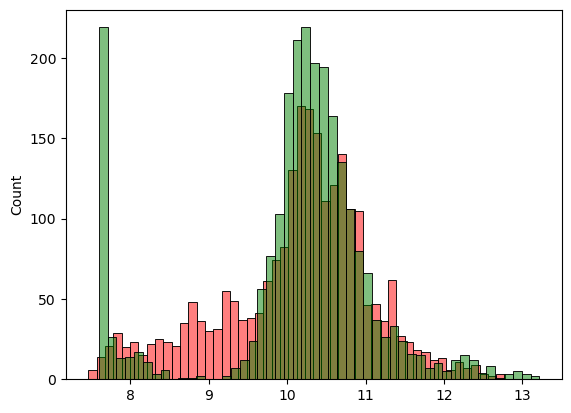

In [93]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='green', alpha=0.5, bins=50)

### Categorical variables

In [94]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [96]:
# let's add feature num_doors_n
(df_train.number_of_doors == 4).astype('int')

0       0
1       1
2       1
3       0
4       1
       ..
7145    0
7146    0
7147    1
7148    1
7149    1
Name: number_of_doors, Length: 7150, dtype: int64

In [97]:
def prepare_X(df):
    base = ['engine_hp',
            'engine_cylinders',
            'highway_mpg',
            'city_mpg',
            'popularity',]
    features = base.copy()
    df = df.copy()
    # age column
    df['age'] = 2017 - df.year
    features.append('age')
    # num_doors_n columns
    for v in [2, 3, 4]:
        column = f'num_doors_{v}'
        df[column] = (df.number_of_doors == v).astype('int')
        features.append(column)
    # take values
    print(features)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [99]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4']
['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4']


np.float64(0.5157995641502352)

In [100]:
# let's take a look on 'make' column
df.make.nunique()

48

In [105]:
def prepare_X(df):
    base = ['engine_hp',
            'engine_cylinders',
            'highway_mpg',
            'city_mpg',
            'popularity',]
    features = base.copy()
    df = df.copy()
    # age column
    df['age'] = 2017 - df.year
    features.append('age')
    # num_doors_n columns
    for v in [2, 3, 4]:
        column = f'num_doors_{v}'
        df[column] = (df.number_of_doors == v).astype('int')
        features.append(column)
    # make columns
    makes = list(df.make.value_counts().head().index)
    for v in makes:
        column = f'make_{v}'
        df[column] = (df.make == v).astype('int')
        features.append(column)
    # take values
    print(features)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [106]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_chevrolet', 'make_ford', 'make_volkswagen', 'make_toyota', 'make_dodge']
['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_chevrolet', 'make_ford', 'make_volkswagen', 'make_toyota', 'make_dodge']


np.float64(0.5076038849557032)

In [107]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [137]:
def prepare_X(df):
    base = ['engine_hp',
            'engine_cylinders',
            'highway_mpg',
            'city_mpg',
            'popularity',]
    features = base.copy()
    df = df.copy()
    # age column
    df['age'] = 2017 - df.year
    features.append('age')
    # num_doors_n columns
    for v in [2, 3, 4]:
        column = f'num_doors_{v}'
        df[column] = (df.number_of_doors == v).astype('int')
        features.append(column)
    # categorical variables
    categorical_variables = [
        'make', 'transmission_type', 'driven_wheels',
        'market_category', 'vehicle_size', 'vehicle_style',
    ]
    for c in categorical_variables:
        categories = list(df[c].value_counts().head().index)
        for v in categories:
            column = f'{c}_{v}'
            df[column] = (df[c] == v).astype('int')
            features.append(column)
    # take values
    print(features)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [109]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_chevrolet', 'make_ford', 'make_volkswagen', 'make_toyota', 'make_dodge', 'transmission_type_automatic', 'transmission_type_manual', 'transmission_type_automated_manual', 'transmission_type_direct_drive', 'transmission_type_unknown', 'driven_wheels_front_wheel_drive', 'driven_wheels_rear_wheel_drive', 'driven_wheels_all_wheel_drive', 'driven_wheels_four_wheel_drive', 'market_category_crossover', 'market_category_flex_fuel', 'market_category_luxury', 'market_category_hatchback', 'market_category_luxury,performance', 'vehicle_size_compact', 'vehicle_size_midsize', 'vehicle_size_large', 'vehicle_style_sedan', 'vehicle_style_4dr_suv', 'vehicle_style_coupe', 'vehicle_style_convertible', 'vehicle_style_4dr_hatchback']
['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_chevrolet', '

np.float64(205.00823520271558)

### Regularization

In [110]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [115]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.0001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_chevrolet', 'make_ford', 'make_volkswagen', 'make_toyota', 'make_dodge', 'transmission_type_automatic', 'transmission_type_manual', 'transmission_type_automated_manual', 'transmission_type_direct_drive', 'transmission_type_unknown', 'driven_wheels_front_wheel_drive', 'driven_wheels_rear_wheel_drive', 'driven_wheels_all_wheel_drive', 'driven_wheels_four_wheel_drive', 'market_category_crossover', 'market_category_flex_fuel', 'market_category_luxury', 'market_category_hatchback', 'market_category_luxury,performance', 'vehicle_size_compact', 'vehicle_size_midsize', 'vehicle_size_large', 'vehicle_style_sedan', 'vehicle_style_4dr_suv', 'vehicle_style_coupe', 'vehicle_style_convertible', 'vehicle_style_4dr_hatchback']
['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_chevrolet', '

np.float64(0.5087645190485687)

### Tuning the model

In [118]:
for r in [0.0, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, score)

0.0 1.2218131720107372e+16 205.00823520271558
10 4.25503302660262 0.5245800361435871
1 5.40362379812033 0.510421105176983
0.1 5.910721906055318 0.5089359010802178
0.01 5.989438241369368 0.5087816038725327
0.001 5.996977218880428 0.5087660744220709
0.0001 5.975601329142943 0.5087645190485687
1e-05 4.101253538936262 0.5087643657084036


In [119]:
r = 0.0001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5087645190485687)

### Using the model

In [124]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [125]:
y_full_train = np.concatenate([y_train, y_val])

In [126]:
r = 0.0001
X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.479867476806553)

In [139]:
categorical_variables = [
    'make', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style',
]
categories = {}
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)


def prepare_X(df):
    base = ['engine_hp',
            'engine_cylinders',
            'highway_mpg',
            'city_mpg',
            'popularity',]
    features = base.copy()
    df = df.copy()
    # age column
    df['age'] = 2017 - df.year
    features.append('age')
    # num_doors_n columns
    for v in [2, 3, 4]:
        column = f'num_doors_{v}'
        df[column] = (df.number_of_doors == v).astype('int')
        features.append(column)
    # categorical variables
    for c, cats in categories.items():
        for v in cats:
            column = f'{c}_{v}'
            df[column] = (df[c] == v).astype('int')
            features.append(column)
    # take values
    print(features)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [129]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [131]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [140]:
X_small = prepare_X(df_small)
X_small

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_chevrolet', 'make_ford', 'make_volkswagen', 'make_toyota', 'make_dodge', 'transmission_type_automatic', 'transmission_type_manual', 'transmission_type_automated_manual', 'transmission_type_direct_drive', 'transmission_type_unknown', 'driven_wheels_front_wheel_drive', 'driven_wheels_rear_wheel_drive', 'driven_wheels_all_wheel_drive', 'driven_wheels_four_wheel_drive', 'market_category_crossover', 'market_category_flex_fuel', 'market_category_luxury', 'market_category_luxury,performance', 'market_category_hatchback', 'vehicle_size_compact', 'vehicle_size_midsize', 'vehicle_size_large', 'vehicle_style_sedan', 'vehicle_style_4dr_suv', 'vehicle_style_coupe', 'vehicle_style_convertible', 'vehicle_style_4dr_hatchback']


array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [143]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]

In [145]:
np.expm1(y_pred)  # predicted price

np.float64(32765.89558316695)

In [147]:
np.expm1(y_test[20])  # real price

np.float64(35000.00000000001)